# 二手房源信息数据分析与可视化

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl
import seaborn as sns

In [2]:
mpl.rcParams['font.sans-serif'] = ['Simhei']
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
#所有房源信息
house = pd.read_csv('house.csv')
house.head()

,index,title,community,years,housetype,square,floor,taxtype,totalPrice,unitPrice,followInfo
0,0,宝星华庭一层带花园，客厅挑高，通透四居室。房主自荐,宝星国际三期,底层(共22层)2010年建板塔结合,4室1厅,298.79平米,底层(共22层)2010年建板塔结合,距离15号线望京东站680米房本满五年,2598,86951,53人关注 / 共44次带看 / 一年前发布
1,1,三面采光全明南北朝向 正对小区绿地花园,顶秀青溪,中楼层(共11层)2008年建板塔结合,3室2厅,154.62平米,中楼层(共11层)2008年建板塔结合,距离5号线立水桥站1170米房本满两年随时看房,1000,64675,323人关注 / 共579次带看 / 一年前发布
2,2,沁园公寓 三居室 距离苏州街地铁站383米,沁园公寓,低楼层(共24层)1999年建塔楼,3室2厅,177.36平米,低楼层(共24层)1999年建塔楼,距离10号线苏州街站383米房本满五年,1200,67659,185人关注 / 共108次带看 / 一年前发布
3,3,金星园东南向户型，四居室设计，中间楼层,金星园,中楼层(共28层)2007年建塔楼,4室2厅,245.52平米,中楼层(共28层)2007年建塔楼,距离机场线三元桥站1153米房本满五年,1650,67205,157人关注 / 共35次带看 / 一年前发布
4,4,龙湾别墅 一期独栋 满五年 带下沉式庭院，精装,龙湾别墅,地下室(共3层)2006年建,3室3厅,351.48平米,地下室(共3层)2006年建,房本满五年,2400,68283,120人关注 / 共42次带看 / 一年前发布


## 数据描述性分析

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16108 entries, 0 to 16107
Data columns (total 11 columns):
index         16108 non-null int64
title         16108 non-null object
community     16108 non-null object
years         16106 non-null object
housetype     16108 non-null object
square        16108 non-null object
floor         16106 non-null object
taxtype       15361 non-null object
totalPrice    16108 non-null int64
unitPrice     16108 non-null int64
followInfo    16108 non-null object
dtypes: int64(3), object(8)
memory usage: 1.4+ MB


In [5]:
# 所有小区信息
community = pd.read_csv('community_describe.csv')
community.head()

,index,id,community,district,bizcircle,tagList,onsale
0,0,1111000004310,什坊院甲3号院,海淀,田村,NaN,0
1,1,1111027373682,大慧寺6号院,海淀,白石桥,NaN,2
2,2,1111027373683,东花市北里东区,东城,东花市,近地铁1号线王府井站,0
3,3,1111027373684,东花市北里西区,东城,东花市,近地铁7号线广渠门内站,7
4,4,1111027373685,东花市北里中区,东城,东花市,近地铁2号线朝阳门站,9


In [6]:
# 合并小区信息和房源信息表，可以获得房源更详细的地理位置
house_detail = pd.merge(house, community, on='community')
# 打印数据
house_detail.head()

,index_x,title,community,years,housetype,square,floor,taxtype,totalPrice,unitPrice,followInfo,index_y,id,district,bizcircle,tagList,onsale
0,0,宝星华庭一层带花园，客厅挑高，通透四居室。房主自荐,宝星国际三期,底层(共22层)2010年建板塔结合,4室1厅,298.79平米,底层(共22层)2010年建板塔结合,距离15号线望京东站680米房本满五年,2598,86951,53人关注 / 共44次带看 / 一年前发布,1535,1111027376204,朝阳,望京,近地铁15号线望京东站,7
1,1234,闹中取静小区，交通购物方便，户型方正客厅挑高。房主自荐,宝星国际三期,中楼层(共22层)2010年建板塔结合,4室1厅,229.97平米,中楼层(共22层)2010年建板塔结合,距离15号线望京东站680米房本满五年,1870,81315,151人关注 / 共106次带看 / 7个月以前发布,1535,1111027376204,朝阳,望京,近地铁15号线望京东站,7
2,2241,宝星华庭 全明格局三居 诚意出售房主自荐,宝星国际三期,中楼层(共14层)2010年建板塔结合,3室2厅,164.06平米,中楼层(共14层)2010年建板塔结合,距离15号线望京东站971米房本满两年随时看房,1340,81678,77人关注 / 共115次带看 / 6个月以前发布,1535,1111027376204,朝阳,望京,近地铁15号线望京东站,7
3,2635,宝星华庭 东南北四居 客厅朝南挑高6米 免个税房主自荐,宝星国际三期,中楼层(共22层)2010年建板塔结合,4室3厅,229.69平米,中楼层(共22层)2010年建板塔结合,距离15号线望京东站680米房本满五年,1800,78367,22人关注 / 共1次带看 / 5个月以前发布,1535,1111027376204,朝阳,望京,近地铁15号线望京东站,7
4,7954,南北通透三居室 客厅餐厅分离 南 北 东三面采光,宝星国际三期,低楼层(共15层)2010年建板塔结合,3室2厅,172.68平米,低楼层(共15层)2010年建板塔结合,距离15号线望京东站1046米房本满五年随时看房,1415,81944,107人关注 / 共43次带看 / 2个月以前发布,1535,1111027376204,朝阳,望京,近地铁15号线望京东站,7


## 数值型数据描述

In [7]:
# 将字符串转换成数字
def data_ad(select_data, str):
    if str in select_data:
        return float(select_data[:-2])
    else:
        return None


# 处理房屋面积数据
house['square'] = house['square'].apply(data_ad, str='平米')

In [8]:
# 查看数据
house.head(1)

,index,title,community,years,housetype,square,floor,taxtype,totalPrice,unitPrice,followInfo
0,0,宝星华庭一层带花园，客厅挑高，通透四居室。房主自荐,宝星国际三期,底层(共22层)2010年建板塔结合,4室1厅,298.79,底层(共22层)2010年建板塔结合,距离15号线望京东站680米房本满五年,2598,86951,53人关注 / 共44次带看 / 一年前发布


In [9]:
house.describe()

,index,square,totalPrice,unitPrice
count,16108.000000,16058.000000,16108.000000,16108.000000
mean,8053.500000,95.870368,747.983735,77656.823814
std,4650.123403,57.622963,536.202306,23616.114546
min,0.000000,11.760000,15.000000,2539.000000
25%,4026.750000,61.042500,439.000000,60449.500000
50%,8053.500000,81.125000,600.000000,75094.000000
75%,12080.250000,112.695000,870.000000,91474.250000
max,16107.000000,2623.280000,12500.000000,159991.000000


## 户型的种类

In [10]:
house.housetype.value_counts()

2室1厅     6582
3室1厅     2534
1室1厅     2472
3室2厅     1424
2室2厅     1018
1室0厅      620
4室2厅      496
4室1厅      181
2房间1卫     100
5室2厅       92
1房间1卫      87
1室2厅       64
4室3厅       55
3房间1卫      44
3室0厅       35
2室0厅       34
车位         32
6室2厅       29
5室3厅       22
联排别墅       19
1房间0卫      16
5室1厅       15
6室3厅       13
独栋别墅       12
3室3厅       11
4室0厅       10
叠拼别墅       10
4房间2卫       9
双拼别墅        9
2房间2卫       6
4房间1卫       6
6室1厅        5
5室4厅        4
7室3厅        3
3房间2卫       3
6室4厅        3
5室5厅        3
6房间4卫       2
2房间0卫       2
3房间3卫       2
5房间3卫       2
2室3厅        2
7室2厅        2
9室4厅        2
6房间2卫       2
4房间3卫       2
6房间3卫       1
7室0厅        1
8房间5卫       1
8室2厅        1
5室0厅        1
5房间2卫       1
4室4厅        1
8室4厅        1
2房间3卫       1
6室0厅        1
7室1厅        1
3室4厅        1
Name: housetype, dtype: int64

In [11]:
car = house[house.housetype.str.contains('车位')]
# 记录中共有车位
car.shape[0]
# 删除车位信息
house.drop(car.index, inplace=True)

## 数据分析1：别墅价格分布

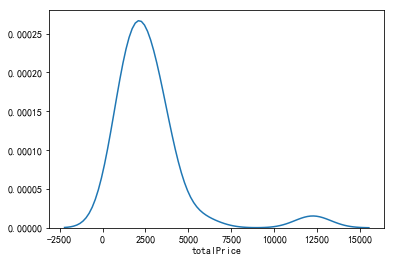

In [12]:
villa = house[house.housetype.str.contains('别墅')]
sns.distplot(villa['totalPrice'], hist=False)

In [13]:
house.drop(villa.index, inplace=True)

## 数据分析2：住房户型分布(前10)

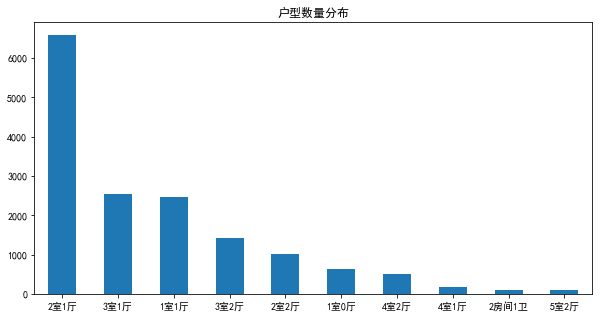

In [14]:
plt.figure(figsize=(10, 5))
house_type = house.housetype.value_counts()
house_type.head(10).plot(kind='bar', title='户型数量分布', rot=0)

## 数据分析3：价格和关注人数的关系

In [15]:
house.head()

,index,title,community,years,housetype,square,floor,taxtype,totalPrice,unitPrice,followInfo
0,0,宝星华庭一层带花园，客厅挑高，通透四居室。房主自荐,宝星国际三期,底层(共22层)2010年建板塔结合,4室1厅,298.79,底层(共22层)2010年建板塔结合,距离15号线望京东站680米房本满五年,2598,86951,53人关注 / 共44次带看 / 一年前发布
1,1,三面采光全明南北朝向 正对小区绿地花园,顶秀青溪,中楼层(共11层)2008年建板塔结合,3室2厅,154.62,中楼层(共11层)2008年建板塔结合,距离5号线立水桥站1170米房本满两年随时看房,1000,64675,323人关注 / 共579次带看 / 一年前发布
2,2,沁园公寓 三居室 距离苏州街地铁站383米,沁园公寓,低楼层(共24层)1999年建塔楼,3室2厅,177.36,低楼层(共24层)1999年建塔楼,距离10号线苏州街站383米房本满五年,1200,67659,185人关注 / 共108次带看 / 一年前发布
3,3,金星园东南向户型，四居室设计，中间楼层,金星园,中楼层(共28层)2007年建塔楼,4室2厅,245.52,中楼层(共28层)2007年建塔楼,距离机场线三元桥站1153米房本满五年,1650,67205,157人关注 / 共35次带看 / 一年前发布
4,4,龙湾别墅 一期独栋 满五年 带下沉式庭院，精装,龙湾别墅,地下室(共3层)2006年建,3室3厅,351.48,地下室(共3层)2006年建,房本满五年,2400,68283,120人关注 / 共42次带看 / 一年前发布


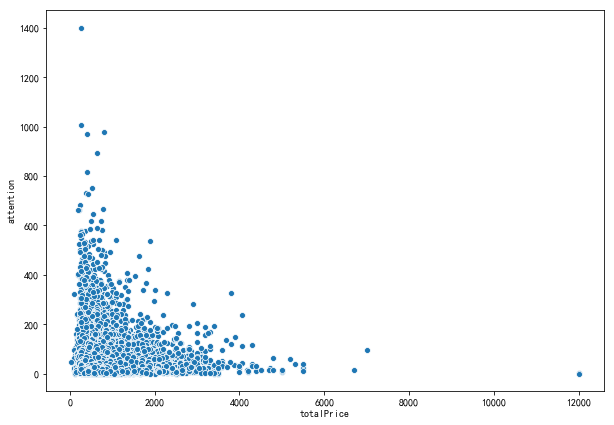

In [16]:
def data_ad(select_data, str):
    if str in select_data:
        return int(select_data.split('/')[0][:-4])
    else:
        return None


house['attention'] = house['followInfo'].apply(data_ad, str='人关注')

plt.figure(figsize=(10, 7))
sns.scatterplot(x='totalPrice', y='attention', data=house)

## 数据分析4：户型和关注人数分布

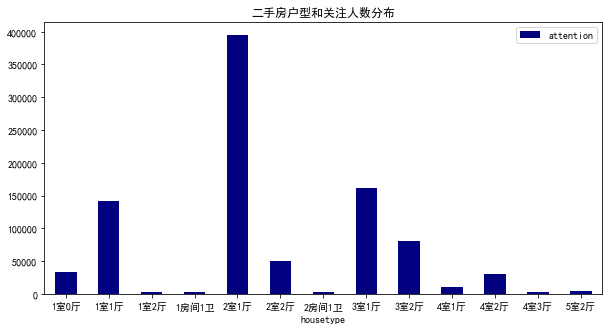

In [17]:
#取户型>50的数据进行可视化
type_interest_group = house.groupby(house['housetype']).agg({
    'housetype': 'count',
    'attention': 'sum'
})

interest_sort = type_interest_group[type_interest_group['housetype'] > 50]
interest_sort.plot(kind='bar',
                   title='二手房户型和关注人数分布',
                   y='attention',
                   rot=0,
                   figsize=(10, 5),
                   cmap='jet')

## 数据分析5：面积分布

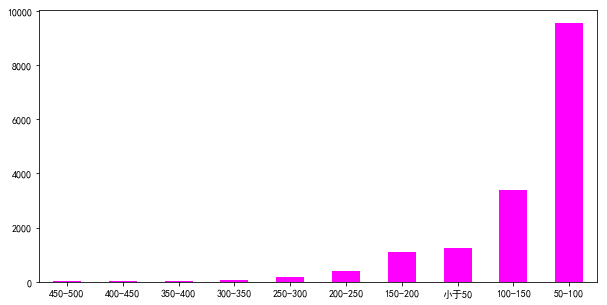

In [18]:
# 面积分布
area_level = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
label_level = [
    '小于50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350',
    '350-400', '400-450', '450-500'
]
area_cut = pd.cut(house['square'], bins=area_level, labels=label_level)
area_cut.value_counts().sort_values().plot(kind='bar',
                                           rot=0,
                                           figsize=(10, 5),
                                           cmap='spring')

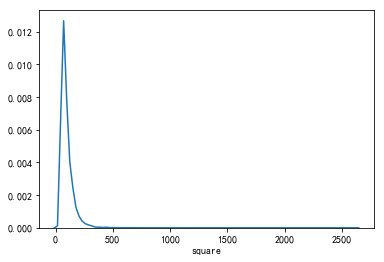

In [19]:
sns.distplot(house['square'], hist=False)

## 数据分析6：各个行政区房源单价均价

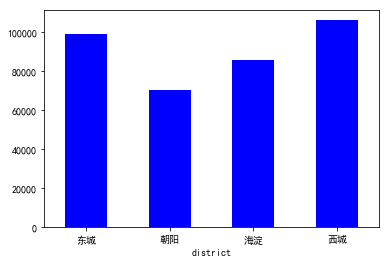

In [20]:
house_unitPrice = house_detail.groupby('district')['unitPrice'].agg(np.mean)
house_unitPrice.plot(kind='bar', cmap='winter', rot=0)

## 各个行政区房源价钱箱线图绘制

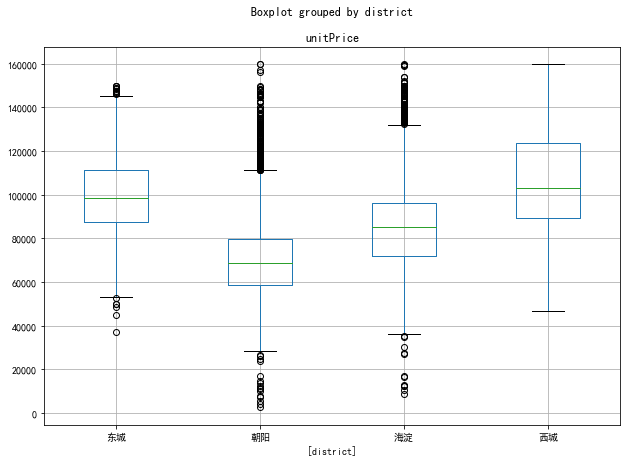

In [21]:
price = house_detail[['district', 'unitPrice']]
price.boxplot(by='district', figsize=(10, 7))

## 社区房屋价格前十可视化

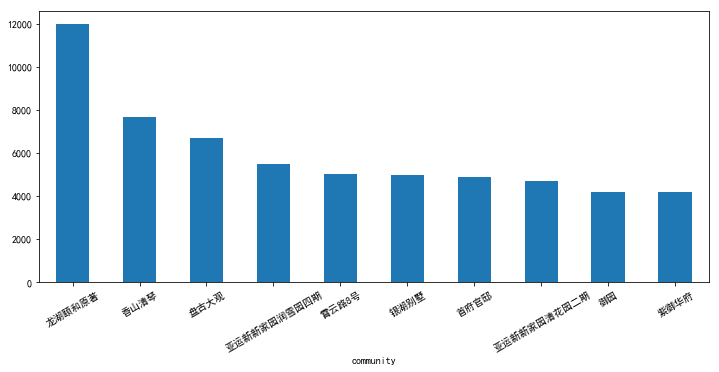

In [22]:
result = house_detail.groupby('community')['totalPrice'].mean().sort_values(
    ascending=False).head(10)
result.plot(kind='bar', rot=30, figsize=(12, 5))